In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [194]:
df=pd.read_csv("C:\\Users\\datla\\OneDrive\\Desktop\\titanic dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [195]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [196]:
df.shape

(418, 12)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [198]:
data=df.drop(columns=["Cabin","Name"],axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,male,34.5,0,0,330911,7.8292,Q
1,893,1,3,female,47.0,1,0,363272,7.0000,S
2,894,0,2,male,62.0,0,0,240276,9.6875,Q
3,895,0,3,male,27.0,0,0,315154,8.6625,S
4,896,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,male,NaN,0,0,359309,8.0500,S


In [199]:
#convert categorical data into numerical data by converting male-0 and female-1
data.replace({"male":0},inplace=True)
data.replace({"female":1},inplace=True)
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,0,34.5,0,0,330911,7.8292,Q
1,893,1,3,1,47.0,1,0,363272,7.0000,S
2,894,0,2,0,62.0,0,0,240276,9.6875,Q
3,895,0,3,0,27.0,0,0,315154,8.6625,S
4,896,1,3,1,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,1,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,0,NaN,0,0,359309,8.0500,S


In [200]:
#replace NaN values in age column and fare column
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Fare"].fillna(data["Fare"].mean(),inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,0,34.50000,0,0,330911,7.8292,Q
1,893,1,3,1,47.00000,1,0,363272,7.0000,S
2,894,0,2,0,62.00000,0,0,240276,9.6875,Q
3,895,0,3,0,27.00000,0,0,315154,8.6625,S
4,896,1,3,1,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,1,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,0,30.27259,0,0,359309,8.0500,S


In [201]:
#Nan values are cleared in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [202]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [203]:
#count how many passengers are survived
len(data[data["Survived"]==1])

152

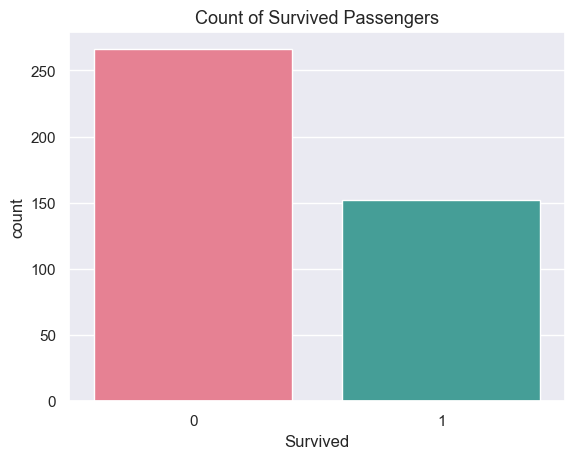

In [245]:
#create countplot for survived passengers
import seaborn as sns
sns.set()
bars=sns.countplot(x="Survived",data=data,palette="husl")
plt.title("Count of Survived Passengers",fontsize=13)
plt.show()


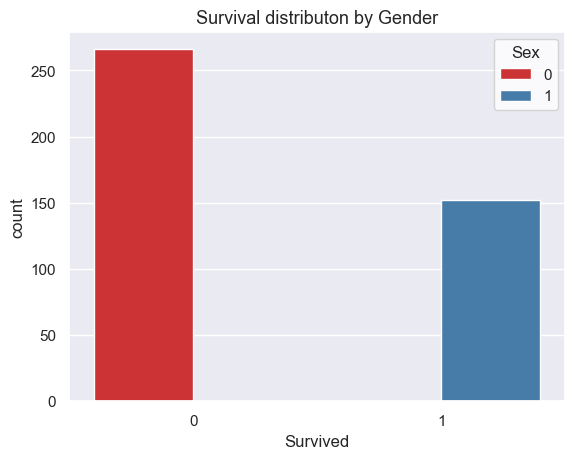

In [205]:
import seaborn as sns
sns.countplot(x="Survived",hue="Sex",data=data,palette="Set1")
sns.set_style("whitegrid")
plt.title("Survival distributon by Gender",fontsize=13)
plt.legend(title="Sex")
plt.show()

Text(0.5, 1.0, 'Age Distribution')

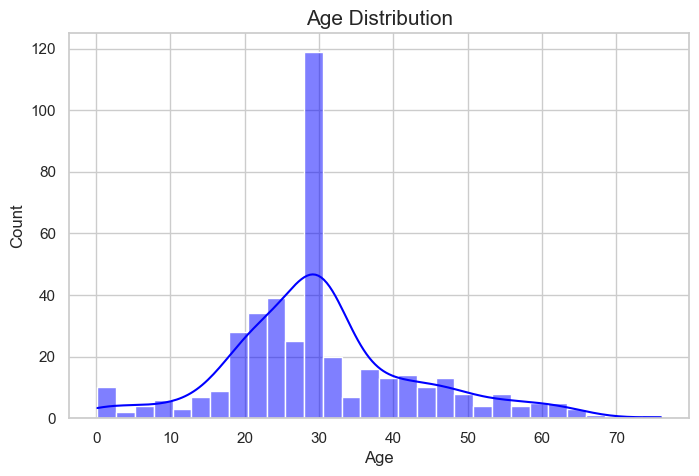

In [206]:
#Age distribution
plt.figure(figsize=(8,5))
sns.histplot(x="Age",data=data,bins=30,kde=True,color="blue")
plt.title("Age Distribution",fontsize=15)

C:\Users\datla\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

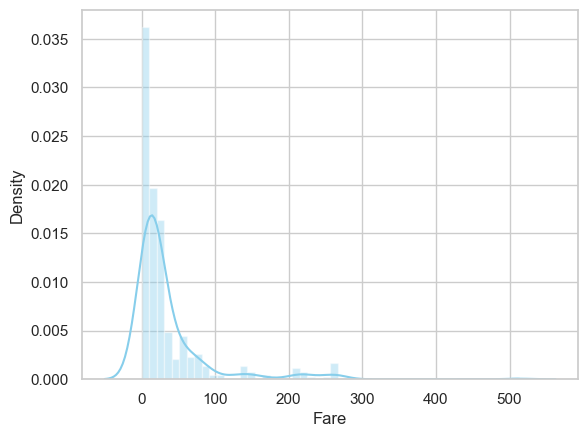

In [250]:
sns.set_style("whitegrid")
sns.distplot(data["Fare"],color="skyblue")

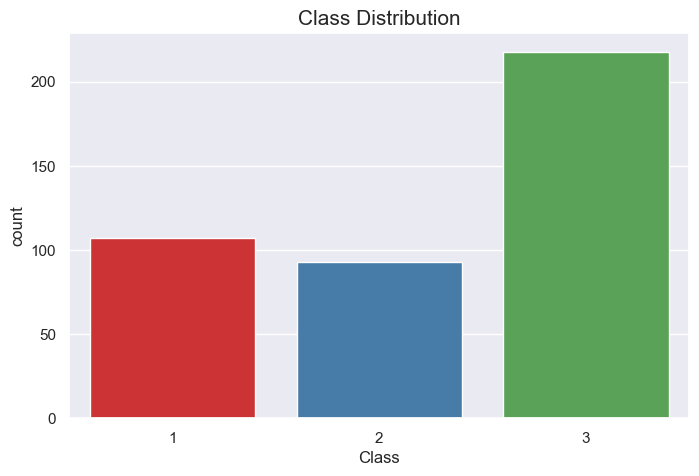

In [207]:
#Pclass distribution
sns.set()
plt.figure(figsize=(8,5))
sns.countplot(x="Pclass",data=data,palette="Set1")
plt.title("Class Distribution",fontsize=15)
plt.xlabel("Class")
plt.show()

In [208]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.030874,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.440782,0.001087,0.018721,-0.576619
Sex,-0.023245,1.000000,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.191382
Age,-0.030874,-0.000011,-0.440782,-0.000011,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.003818,0.099943,0.001087,0.099943,-0.079535,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,0.159120,-0.045073,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.191382,0.326800,0.171488,0.230001,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

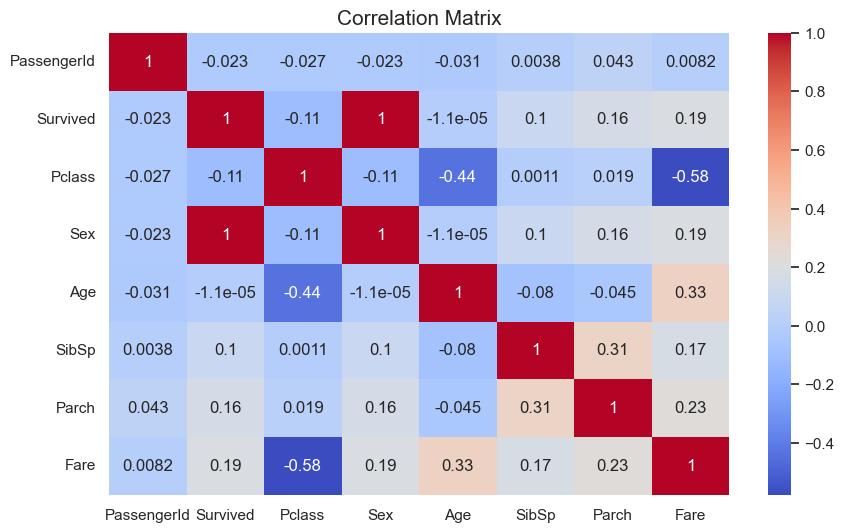

In [209]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix",fontsize=15)

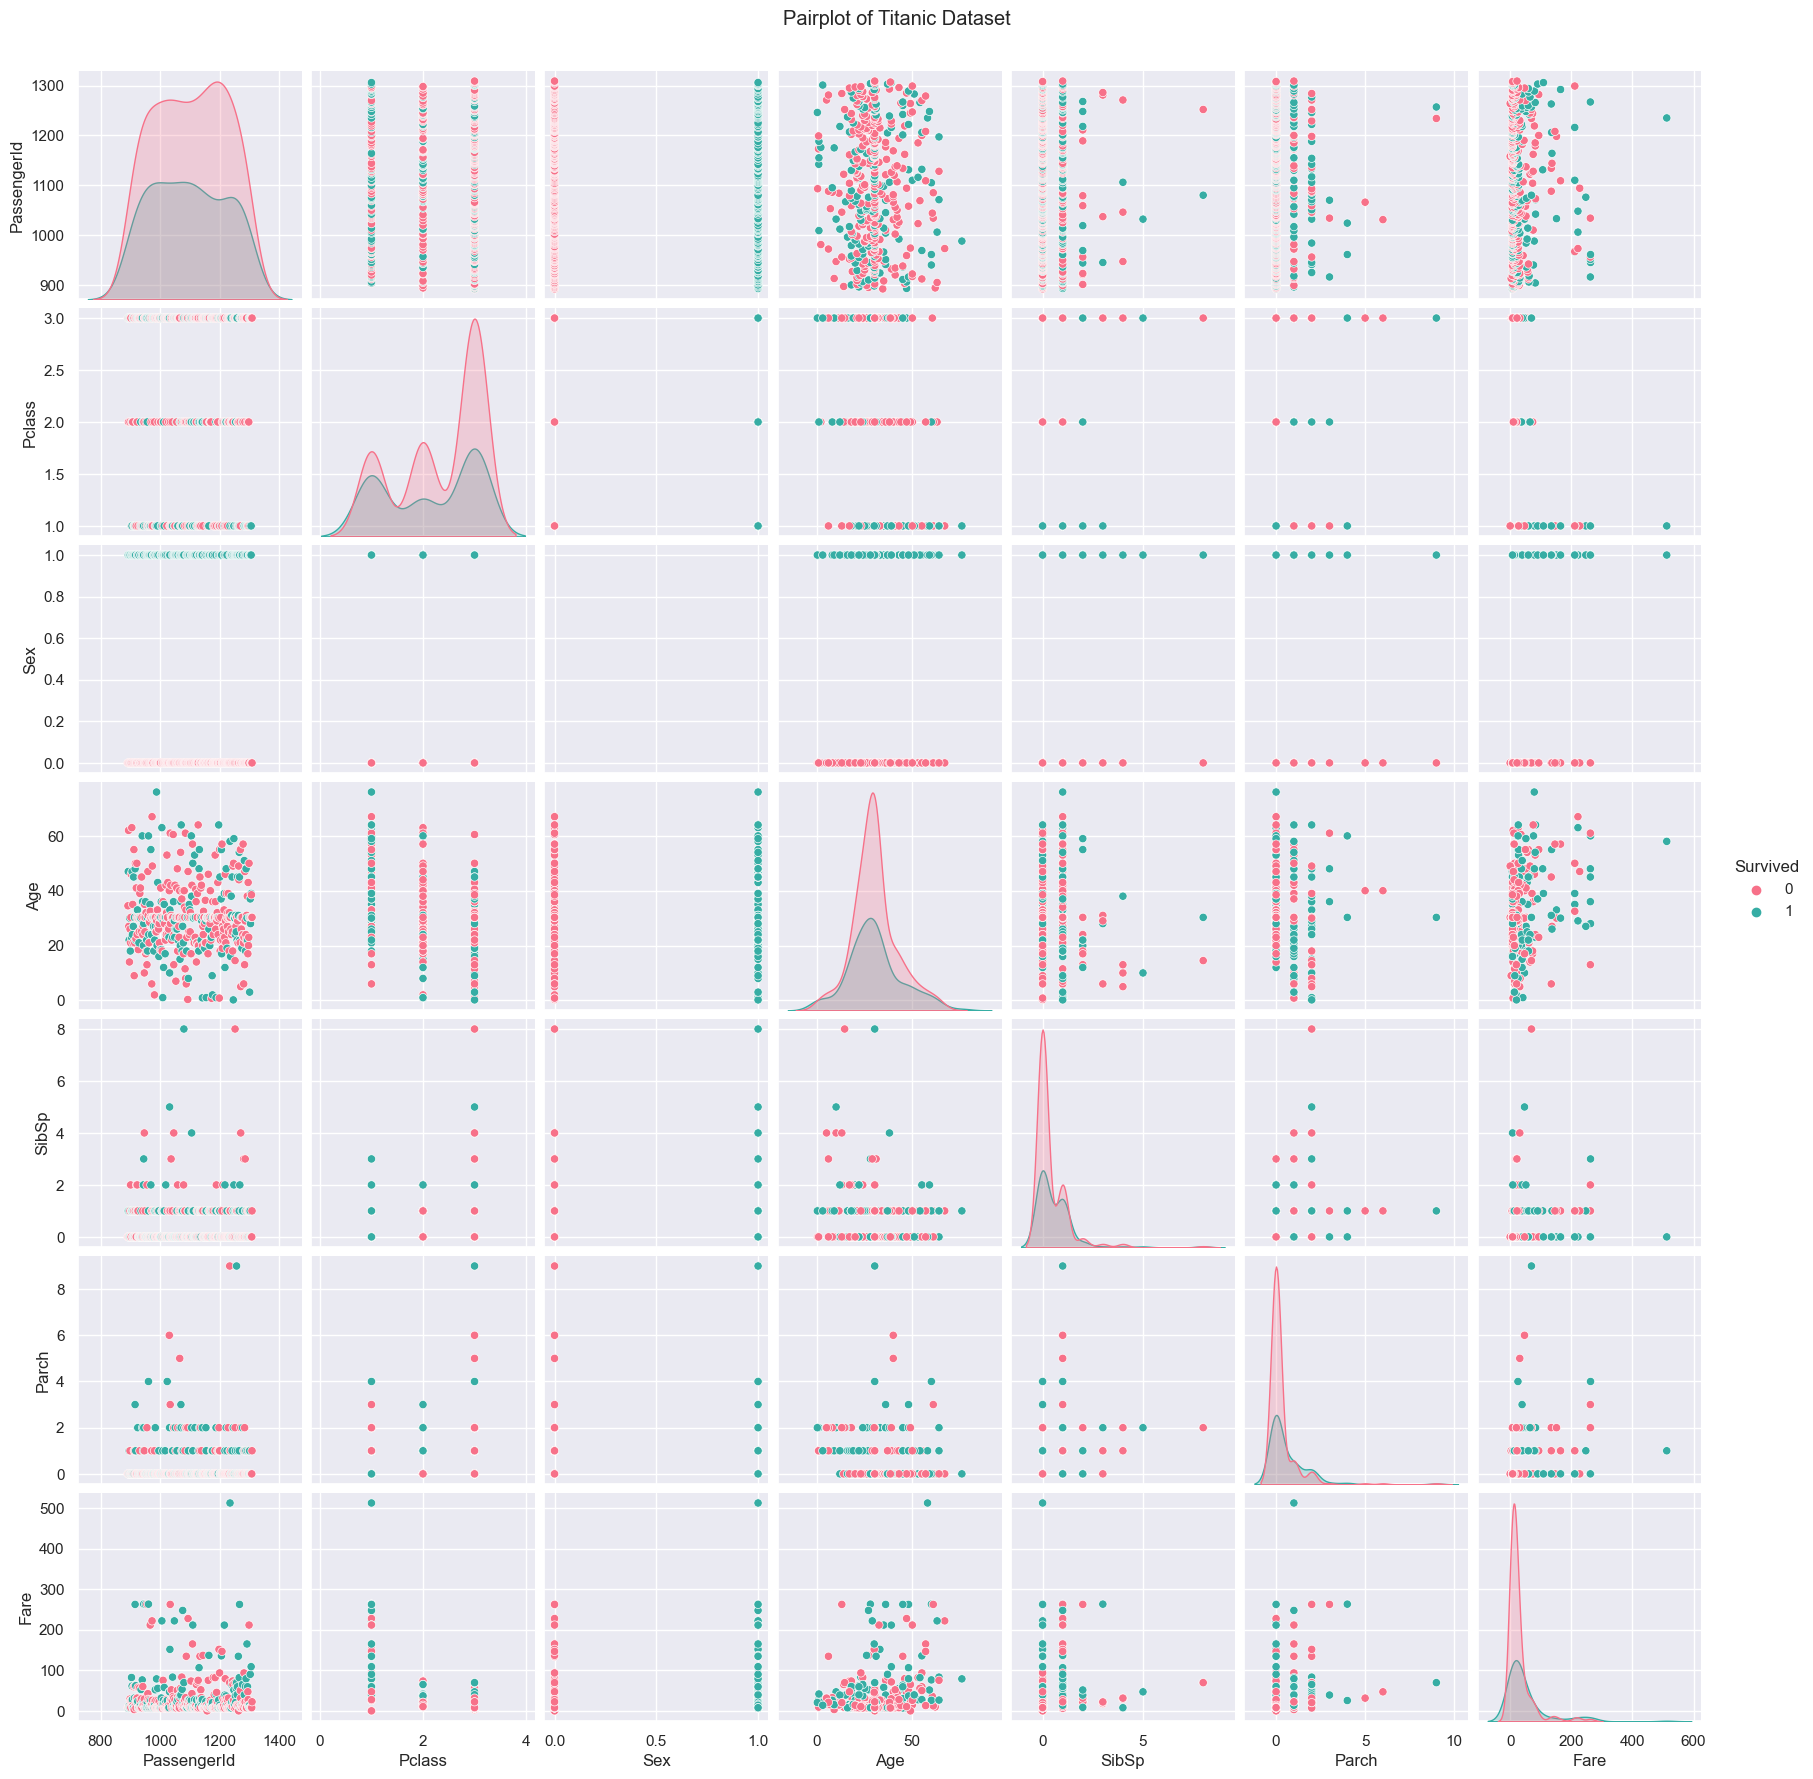

In [221]:
sns.pairplot(data, hue='Survived', palette='husl')
plt.suptitle('Pairplot of Titanic Dataset',y=1.02)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

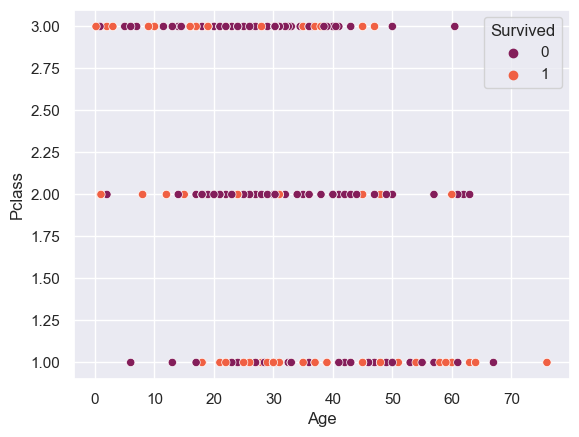

In [217]:
#scatterplot for age vs Pclass
sns.scatterplot(x="Age",y="Pclass",data=data,hue="Survived",palette="rocket")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

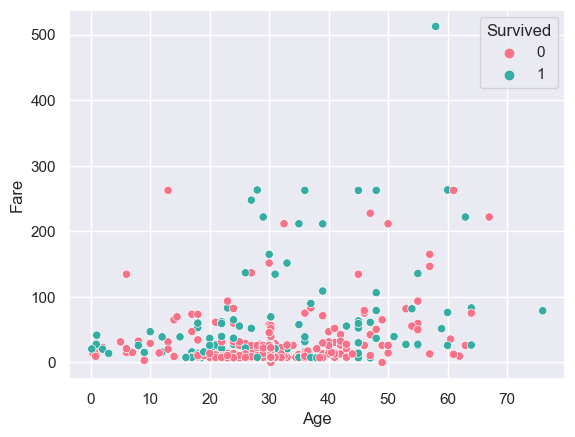

In [218]:
#scatterplot for age vs fare
sns.scatterplot(x='Age', y='Fare', data=data,hue="Survived",palette="husl")


In [219]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,0,34.5,0,0,330911,7.8292,Q
1,893,1,3,1,47.0,1,0,363272,7.0000,S
2,894,0,2,0,62.0,0,0,240276,9.6875,Q
3,895,0,3,0,27.0,0,0,315154,8.6625,S
4,896,1,3,1,22.0,1,1,3101298,12.2875,S


In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x=data[["Pclass","Age","SibSp","Parch","Fare"]]
y=data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(418, 5) (334, 5) (84, 5)


In [244]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6428571428571429
